# Dataset Downloading

In [4]:
!pip install -q kaggle
from google.colab import files

# Upload your kaggle.json file (you need to get this from your Kaggle account)
files.upload()  # Select the kaggle.json file you downloaded from Kaggle

# Move the kaggle.json file to the right location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [5]:
!kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

Dataset URL: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression
License(s): unknown


In [6]:
!unzip heart-disease-prediction-using-logistic-regression.zip

Archive:  heart-disease-prediction-using-logistic-regression.zip
  inflating: framingham.csv          


In [7]:
import numpy as np
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

# Data Cleaning

In [8]:
import pandas as pd

data = pd.read_csv('framingham.csv')

In [9]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [12]:
# Null Values
data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [13]:
data = data.dropna()
data.shape

(3656, 16)

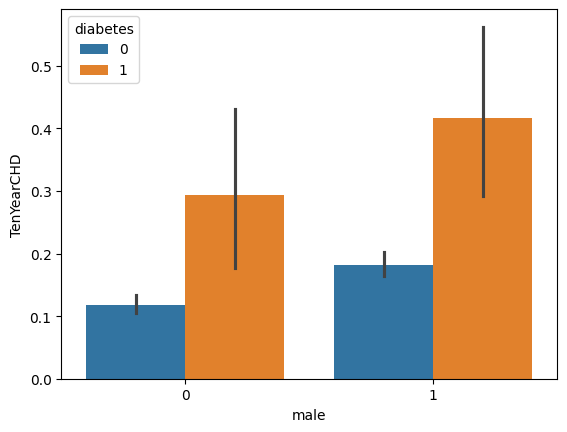

In [14]:
# Gender, 10-year CHD risk, and diabetes
sns.barplot(x="male", y="TenYearCHD", hue="diabetes", data=data)
plt.show()

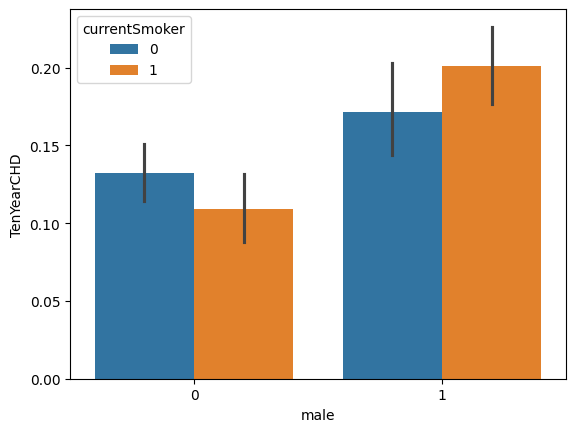

In [15]:
#  Gender, 10-year CHD risk, and smoking status
sns.barplot(x="male", y="TenYearCHD", hue="currentSmoker", data=data)
plt.show()

# Logistics Regression

In [16]:
def weightInitialization(n_features):
  w = np.zeros((n_features, 1))  # Zero initialization # Initialize weights with random values
  b = 0  # Initialize bias with 0

  return w, b

In [17]:
def sigmoid_activation(z):

    y = 1 / (1 + np.exp(-z))
    return y

In [18]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]

    A = sigmoid_activation(np.dot(X, w) + b)

    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    dw = (1 / m) * np.dot(X.T, (A - Y))
    db = (1 / m) * np.sum(A - Y)

    grads = {"dw": dw, "db": db}
    return grads, cost

In [19]:
def model_optimize_reg(w, b, X, Y, reg=None, lambd=0.1):
    m = X.shape[0]

    A = sigmoid_activation(np.dot(X, w) + b)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    if reg == "l1":
        cost += (lambd / (2 * m)) * np.sum(np.abs(w))
    elif reg == "l2":
        cost += (lambd / (2 * m)) * np.sum(np.abs(w))


    dw = (1 / m) * np.dot(X.T, (A - Y))
    db = (1 / m) * np.sum(A - Y)

    if reg == "l1":
        dw += (lambd / m) * np.sign(w)
    elif reg == "l2":
        dw += (lambd / m) * w

    grads = {"dw": dw, "db": db}

    return grads, cost

In [30]:
def model_fit(w, b, X_train, Y_train, X_test, Y_test, learning_rate, no_iterations):
    costs = []
    train_accuracies = []
    test_accuracies = []

    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X_train, Y_train)
        dw = grads["dw"]
        db = grads["db"]

        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 10 == 0:
            costs.append(cost)

            train_predictions = np.dot(X_train, w) + b > 0.5  # Assuming sigmoid activation for binary classification
            test_predictions = np.dot(X_test, w) + b > 0.5

            train_accuracy = np.mean(train_predictions == Y_train) * 100
            test_accuracy = np.mean(test_predictions == Y_test) * 100

            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)

    coeff = {"w": w, "b": b}
    return coeff, costs, train_accuracies, test_accuracies

# Helping Functions

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def plot_training_vs_testing_accuracy(train_accuracies, test_accuracies):
    """
    Plots the training accuracy vs testing accuracy over epochs.

    Parameters:
    - train_accuracies: list of training accuracies over epochs.
    - test_accuracies: list of testing accuracies over epochs.
    """

    epochs = range(1, len(train_accuracies) + 1)

    plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
    plt.plot(epochs, test_accuracies, 'r-', label='Testing Accuracy')

    plt.title('Training vs. Testing Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_confusion_matrix(Y_test, Y_pred):

    cm = confusion_matrix(Y_test, Y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Test Train Split

In [23]:
# Convert TenYearCHD column to 0 and 1
data['TenYearCHD'] = data['TenYearCHD'].map({0: 0, 1: 1})

In [24]:
# Define target variable (y) and features (x_data)
x_data = data.drop(columns = 'TenYearCHD')
y = data['TenYearCHD']

In [25]:
# Normalize the feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)
x_data_scaled

array([[ 1.11982472, -1.23335117,  1.97575158, ...,  0.29168785,
         0.35633992, -0.20312694],
       [-0.8929969 , -0.41559058,  0.01979497, ...,  0.7246142 ,
         1.60828949, -0.24495595],
       [ 1.11982472, -0.1819447 , -0.95818334, ..., -0.10926099,
        -0.06097661, -0.49592996],
       ...,
       [ 1.11982472,  0.05170118, -0.95818334, ...,  0.04570696,
        -0.81214636,  0.17333408],
       [ 1.11982472,  0.16852412,  0.99777327, ..., -1.49413337,
        -0.89560966, -0.57958797],
       [-0.8929969 ,  0.28534706,  0.01979497, ..., -1.06120701,
         0.35633992,  1.05174313]])

In [26]:
# Train-test split - 80-20 or 70-30
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y, test_size=0.2, random_state=42)

In [27]:
# No need to reshape x_train and x_test; they should remain 2D
# Only y_train and y_test need to be 1D
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Fitting Model

In [28]:
# Initialize weights and bias
n_features = x_train.shape[1] #number of features
w, b = weightInitialization(n_features)

In [31]:
# Train the model
learning_rate = 0.01
no_iterations = 500
coeff, costs, train_accuracies, test_accuracies = model_fit(w, b, x_train, y_train, x_test, y_test, learning_rate, no_iterations)

# Visualization

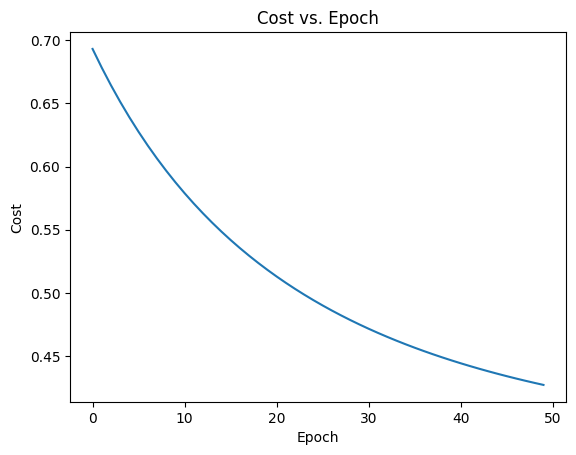

In [32]:
# Cost vs Epoch Curve
plt.plot(range(len(costs)), costs)
plt.title('Cost vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

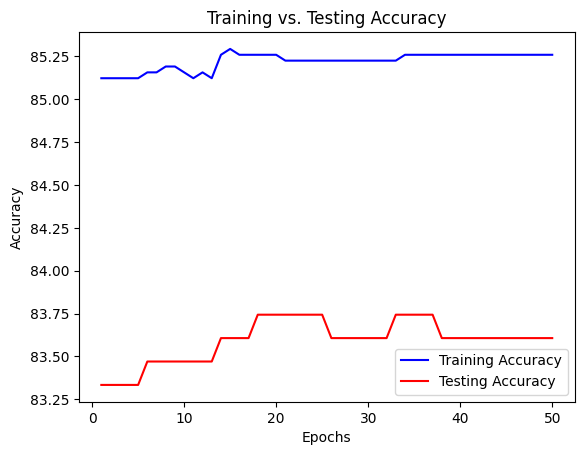

In [33]:
# test vs train accuracy
plot_training_vs_testing_accuracy(train_accuracies, test_accuracies)

# Predicting

In [34]:
# Prediction function using the learned weights and bias
def model_predict(w, b, X):
    # complete the prediction function
    z = np.dot(X, w) + b

    y_pred = sigmoid_activation(z)

    y_pred = (y_pred > 0.5).astype(int)

    return y_pred

# Get predictions on the test set
y_pred = model_predict(coeff['w'], coeff['b'], x_test)

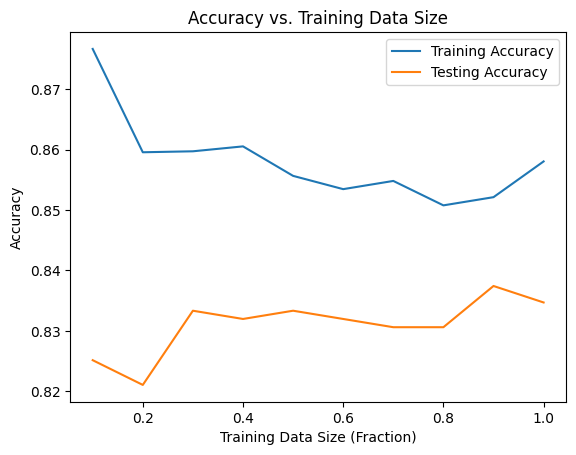

In [35]:
# Using smaller portions of the training data to see how accuracy changes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def train_and_evaluate_model(x_train, y_train, x_test, y_test, training_sizes, learning_rate=0.01, no_iterations=1000):
    """
    Trains and evaluates the logistic regression model for different training data sizes.

    Args:
        x_train: The training features.
        y_train: The training labels.
        x_test: The testing features.
        y_test: The testing labels.
        training_sizes: A list of fractions representing the proportion of training data to use.
        learning_rate: The learning rate for gradient descent.
        no_iterations: The number of iterations for gradient descent.

    Returns:
        A dictionary containing the training and testing accuracies for each training size.
    """

    accuracies = {'train': [], 'test': []}

    for size in training_sizes:
        n_samples = int(len(x_train) * size)
        subset_x_train, subset_y_train = x_train[:n_samples], y_train[:n_samples]

        n_features = subset_x_train.shape[1]
        w, b = weightInitialization(n_features)

        coeff, costs, train_accuracies, test_accuracies = model_fit(w, b, subset_x_train, subset_y_train, x_test, y_test, learning_rate, no_iterations)

        y_pred = model_predict(coeff['w'], coeff['b'], x_test)

        train_accuracy = accuracy_score(subset_y_train, model_predict(coeff['w'], coeff['b'], subset_x_train))
        test_accuracy = accuracy_score(y_test, y_pred)
        accuracies['train'].append(train_accuracy)
        accuracies['test'].append(test_accuracy)

    return accuracies

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

accuracies = train_and_evaluate_model(x_train, y_train, x_test, y_test, training_sizes)

plt.plot(training_sizes, accuracies['train'], label='Training Accuracy')
plt.plot(training_sizes, accuracies['test'], label='Testing Accuracy')
plt.xlabel('Training Data Size (Fraction)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Data Size')
plt.legend()
plt.show()

# Calculating Accuracy

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.74%


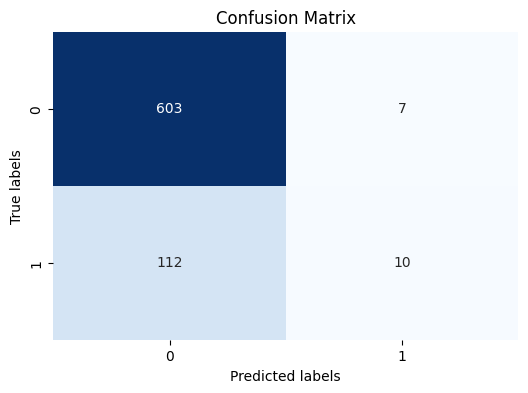

In [37]:
# Visualize the confusion matrix
plot_confusion_matrix(y_test, y_pred)

In [38]:
# find other accuracy metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

Precision: 0.59
Recall: 0.08
F1-Score: 0.14


# Sklearn Models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train.ravel())  # ravel() to flatten y_train
lr_predictions = lr_model.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())  # ravel() to flatten y_train
nb_predictions = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

# Calculate different accuracy metrics (for Logistic Regression)
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.2f}")
print(f"Precision: {precision_score(y_test, lr_predictions):.2f}")
print(f"Recall: {recall_score(y_test, lr_predictions):.2f}")
print(f"F1-score: {f1_score(y_test, lr_predictions):.2f}")

# Confusion Matrix (for Logistic Regression )
cm = confusion_matrix(y_test, lr_predictions)
print("\nConfusion Matrix (Logistic Regression):\n", cm)

Logistic Regression Accuracy: 83.61%
Decision Tree Accuracy: 73.50%
Naive Bayes Accuracy: 80.19%

Logistic Regression Metrics:
Accuracy: 0.84
Precision: 0.56
Recall: 0.08
F1-score: 0.14

Confusion Matrix (Logistic Regression):
 [[602   8]
 [112  10]]
